# Lecture 3 - Programming 

## What we are going to cover today

### Fundamentals of programming. How does a computer actually run software? What are the basic operations of programming?
- Data structures - variables, lists, arrays/matrices, data frames, objects.
- The four fundamental operations a computer does:
    1. Arithmetic
    2. Assignment
    3. Decision
    4. Looping
- How do they work in R. What abstractions are used to make our life easier (or harder) in R. Vectorization and functions.

### Fundamentals of data management. How do we work with datasets? How do we load data, save data, and _wrangle_ with data?

# 1. Prerequisites

First things first!

**It's a good idea to comment your code!**

All lines starting with 

### Loading packages and setting up the environment.

R contains modules that add fuctionalities to R called packages. 

You can install packages directly in R like this. You only need to do this step **once**. However, there is **nothing wrong** if you install packages each time you run your script. It may just ve slow: 

In [3]:
# To do cool graphics:
#install.packages('ggplot2')
# To do data manipulations:
#install.packages('tidyverse')
# To read excel:
#install.packages("readxl")

**Remember you always need to load packages before using them**. 

In [1]:
library('ggplot2')
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.3     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Also note, sometimes, packages conflict with other packages, as they contain functions that are identical in name. One frequent example is **plyr** and **dplyr**. 

You can either choose to either use one package only, or you can call the desired function explicitly (using "explicit namespacing") using **package::function**. If R includes it by default, use **base::** as the package name (namespace)

In [4]:
a=c(10,25,50)

base::sum(a)
sum(a)

[1] 85

[1] 85

# 2. Data structures and data

### A variable is an object storing data:

In [5]:
integer_var = 1
float_var = 1.5
nothing_var = NA
string_var = 'This is a string'
boolean_var = TRUE

# And we can do operations

integer_var + float_var
integer_var - float_var
integer_var * float_var
integer_var / float_var
integer_var == float_var
integer_var == 1
integer_var > float_var


[1] 2.5

[1] -0.5

[1] 1.5

[1] 0.6666667

[1] FALSE

[1] TRUE

[1] FALSE

# R is vectorial. 

## This means:

### we can store not only numbers, but also vectors and matrixes (collections of numbers)
### we can compute not only number additions, but also addition and multiplication of vectors and matrixes. All operations that work on numbers extend on  vectors and matrixes

So, for example:

## Vectors

### Vectors are lists of numbers.

In [8]:
X <- c(1,2,3,4,5)
Y <- c(10,20,30,40,50)
Z = c(X,Y)

### `c(elements)` makes vectors

In [9]:
X
Y
Z
c(Z,1)

[1] 1 2 3 4 5

[1] 10 20 30 40 50

[1]  1  2  3  4  5 10 20 30 40 50

[1]  1  2  3  4  5 10 20 30 40 50  1

#### And `:` makes sequences. 
`1:5 == c(1,2,3,4,5)`  

In [10]:
seq_a=1:5
seq_b=c(1,2,3,4,5)
seq_a
seq_b
seq_a == seq_b

[1] 1 2 3 4 5

[1] 1 2 3 4 5

[1] TRUE TRUE TRUE TRUE TRUE

#### The size is given by length.


In [11]:
length(X)
length(Y)
length(Z)

[1] 5

[1] 5

[1] 10

#### And to get the n'th element, just do `VECTOR[element]` 
#### In R, the first element is 1

### The `[element]` in a vector is called an index

In [12]:
X[1]
Y[3]

[1] 1

[1] 30

#### And you can partition using :


In [13]:
X
Y[1:3]
X[-1]

[1] 1 2 3 4 5

[1] 10 20 30

[1] 2 3 4 5

### All operations are vectorial, thus, work on vectors automatically

In [19]:
X+Y

[1] 11 22 33 44 55

In [22]:
X
Y
X*Y

[1] 1 2 3 4 5

[1] 10 20 30 40 50

[1]  10  40  90 160 250

In [21]:
Y-X

[1]  9 18 27 36 45

In [17]:
X%*%Y

550


### In statistics, X*Y is refered to as an interaction between X and Y. Think about this when you solve assignment 1.1 and "centering".
### X %*% Y is the vectorial product of two vectors, works identically to matrix multiplication with one caveat.

## Matrixes

### Matrixes are vectors of identical vectors, 2-dimensional tables of numbers

In [18]:
column_1 = c(1,2,3)
column_2 = c(2,9,20)
column_3 = c(10,20,30)
matrix_m = matrix(c(column_1,column_2,column_3),nrow=3,ncol=3)
matrix_m

1,2,10
2,9,20
3,20,30


#### We use `matrix_m[ROW, COLUMN]` to point to individual values
#### `matrix_m[ROW, ]` returns a whole row
#### `matrix_m[,COLUMN ]` returns a whole column

In [141]:
matrix_m[1,3]

[1] 10

In [142]:
matrix_m[3,]

[1]  3 20 30

In [143]:
matrix_m[,2]

[1]  2  9 20

You can even specify a vector of columns and rows to return!

In [288]:
matrix_m[c(1,2),]

1,2,10
2,9,20


In [151]:
matrix_m[c(1,2),c(1,3)]

1,10
2,20


### Data Frames and Tibbles

### Dataframes are matrixes where:

#### 1. Columns can be heterogenous - i.e. each column can be of a different type
#### 2. Columns have names.

### Tibbles are a slightly improved version of data-frames. They can easily be converted between each other, and this generally happens without you knowing
### We will call both data-frames and tibbles tables in this tutorial

In [24]:
country = c('Afghanistan','Pakistan','India','Uzbekistan')
gdp = c(2452,7932,6932,9201)
battles = c(64,81,12,20)
asia_fighting = data.frame(country=country, gdp=gdp, battles=battles)
asia_fighting

country,gdp,battles
<fct>,<dbl>,<dbl>
Afghanistan,2452,64
Pakistan,7932,81
India,6932,12
Uzbekistan,9201,20


In [25]:
## Indexing with a single [] will return a data frame IF POSSIBLE.
## ONE INDEX RETURNS THE COLUMN
asia_fighting['gdp']

## TWO INDEXES ARE ALWAYS row, column:
# First row:
asia_fighting[1,]

# First two rows:
asia_fighting[c(1,2),]

# First and third column
asia_fighting[,c(1,3)]

# Only GDP and Battles for third row
asia_fighting[3,c(2,3)]

# Only GDP and Battles for Uzbekistan
asia_fighting['country'=='Uzbekistan']

gdp
<dbl>
2452
7932
6932
9201


,country,gdp,battles
,<fct>,<dbl>,<dbl>
1,Afghanistan,2452,64


,country,gdp,battles
,<fct>,<dbl>,<dbl>
1,Afghanistan,2452,64
2,Pakistan,7932,81


country,battles
<fct>,<dbl>
Afghanistan,64
Pakistan,81
India,12
Uzbekistan,20


,gdp,battles
,<dbl>,<dbl>
3,6932,12


1
2
3
4

Calling with only ONE `[..]` will return a data frame if possible.

Always call with TWO `[[...]]` to return a vector or a scalar (single-value) number. However, it must ONLY return 1 column OR 1 row OR 1 value!

Be careful, since dataframes and vectors are manipulated in different ways.

In [26]:
asia_fighting['gdp']
asia_fighting[['gdp']]
asia_fighting$gdp

gdp
<dbl>
2452
7932
6932
9201


[1] 2452 7932 6932 9201

[1] 2452 7932 6932 9201

In [27]:
asia_fighting[2,2]
asia_fighting[[2,2]]

[1] 7932

[1] 7932

## EXTRABITS : LISTS!

### Lists are vectors of heterogenous vectors

In [167]:
list_1 <- list(
  1:3, 
  "a", 
  c(TRUE, FALSE, TRUE), 
  c(2.3, 5.9)
)list_1
list_1

[[1]]
[1] 1 2 3

[[2]]
[1] "a"

[[3]]
[1]  TRUE FALSE  TRUE

[[4]]
[1] 2.3 5.9

In [170]:
list_1[1]

[[1]]
[1] 1 2 3

## EXTRABITS : MATRIX OPERATIONS!

Operations also work on matrixes, as matrixes are also vectors!

In [41]:
X = c(1,2,-1)
Y = matrix(c(10,20,30,40,50,60), nrow=3, ncol=2)

X
Y

[1]  1  2 -1

10,40
20,50
30,60


In [42]:
X*Y

10,40
40,100
-30,-60


In [45]:
X%*%Y

20,80


In [28]:
X = matrix(c(1,2,3,4), nrow=2, ncol=2)
Y = matrix(c(5,10,50,100), nrow=2, ncol=2)

print('X:')
X

print('Y:')
Y

[1] "X:"


1,3
2,4


[1] "Y:"


5,50
10,100


In [33]:
print("X+Y:")
X+Y


[1] "X+Y:"


6,53
12,104


In [39]:
print ("Do you remember your highschool algebra?") 
print("X*Y does the element :")
X*Y
X%*%Y

[1] "Do you remember your highschool algebra?"
[1] "X*Y does the element :"


5,150
20,400


35,350
50,500


# 3. Basic Programming technique

#### Programming means making a machine think.
#### Thinking (in this context) three things:

  1. Calculate stuff (e.g. 4*2, 2+10, mean(x), sd(y)). By calculate we mean simple stuff (addition, subtraction, division, multiplication and simple logic, i.e. AND, OR, NOT)!. This is called in CS-lingo "arithmetic".
  2. Store results in memory, and retrieve them for later use. This is called "assignment".
  2. make decisions (given some alternatives, pick 1, or more). This is called "logic".

#### And computers can only make TWO kinds of decisions:
  1. Choose, based on some logic, between doing something or something else. This is called "branching"
  2. Choose, based on some logic, to repeat an action a number of times (or until a condition is met). This is called "looping".
  All these decisions do one thing and one thing only - change the way the program is run (i.e. the program flow)

#### So all in all, a computer can only do four things <font color="red"><u>Arithmetic, Assignment, Branch, Loop</u></font>

EXTRA BIT: This can actually be reduced further - as computers actually do even less. How far can we go?


## Program Flow

![flow](img/pf_run.png)

![if](img/pf_if.png)

In [49]:
a <-64
#a <- -10
if (a>0) 
{
  print (sqrt(a))
} else {
  print ("I can't compute a square root of a negative number!")
}

[1] 8


![for](img/pf_for.png)

In [59]:
x <- 0
for (i in 1:5)
    {
    x <- x + 2^i
    print('******')
    print(i)
    print(x)
    }
print("DoneLoop")
x = x*10
print(x)

[1] "******"
[1] 1
[1] 2
[1] "******"
[1] 2
[1] 6
[1] "******"
[1] 3
[1] 14
[1] "******"
[1] 4
[1] 30
[1] "******"
[1] 5
[1] 62
[1] "DoneLoop"
[1] 620


![for](img/pf_for2.png)

In [60]:
vect = c(2,5,10,3)
x <- 0
for (i in vect)
    {
    x <- x + 2^i
    print('******')
    print(i)
    print(x)
    }
print("DoneLoop")
x = x*10
print(x)

[1] "******"
[1] 2
[1] 4
[1] "******"
[1] 5
[1] 36
[1] "******"
[1] 10
[1] 1060
[1] "******"
[1] 3
[1] 1068
[1] "DoneLoop"
[1] 10680


![for](img/pf_forfor.png)

In [171]:
a=matrix(c(1,2,3,-10,20,+30,15,-30,45,10,100,100),nrow=4, ncol=3)
a
nrow(a)
ncol(a)

for (i in 1:nrow(a)) 
{
    for (j in 1:ncol(a))
     {
         print (a[i,j])
     }
}

1,20,45
2,30,10
3,15,100
-10,-30,100


[1] 4

[1] 3

[1] 1
[1] 20
[1] 45
[1] 2
[1] 30
[1] 10
[1] 3
[1] 15
[1] 100
[1] -10
[1] -30
[1] 100


## Functions

![func](img/pf_func.png)

#Anything looking like `XXXX(stuff)` is a function call!

`glm(y~X)` is a function call to the function `glm`. Thus, we don't need to write all the code doing regression each time we want to do a regression!

In [373]:
last_day_in_month <- function (month)
  { 
    months = c(31,28,31,30,31,30,31,31,30,30,30,31)
    return (months[month]) 
  }

last_day_in_month(3)
last_day_in_month(2)

[1] 31

[1] 28

In [374]:
battles_by_month <- data.frame(battles=c(31,28,63,62,11,32,53,2), month=c(1,2,2,3,5,6,2,3), battles_by_day=NA)
battles_by_month

for (i in 1:nrow(battles_by_month))
{
  battles_by_month[i,'battles_by_day'] <- battles_by_month[i,'battles']/last_day_in_month(battles_by_month[i,'month'])
}
battles_by_month

battles,month,battles_by_day
31,1,NA
28,2,NA
63,2,NA
62,3,NA
11,5,NA
32,6,NA
53,2,NA
2,3,NA


battles,month,battles_by_day
31,1,1.00000000
28,2,1.00000000
63,2,2.25000000
62,3,2.00000000
11,5,0.35483871
32,6,1.06666667
53,2,1.89285714
2,3,0.06451613


## Let's walk you through some of the code
#### You have seen this code before, so I will make it fast.

In [401]:
reps <- 1000 # Set the number of repetitions at the top of the script
par.est <- matrix(NA, nrow = reps, ncol = 4) # Empty matrix to store the
# estimates 
b0 <- .2 # True value for the intercept
b1 <- .5 # True value for the slope
n <- 1000 # Sample size
X <- runif(n, -1, 1) # Create a sample of n observations on the 
# independent variable X

for(i in 1:reps){ # Start the loop
  Y <- b0 + b1*X + rnorm(n, 0, 1) # The true DGP, with N(0, 1) error
  model <- lm(Y ~ X) # Estimate OLS model
  vcv <- vcov(model) # Variance-covariance matrix
  par.est[i, 1] <- model$coef[1] # Put the estimate for the intercept
  # in the first column
  par.est[i, 2] <- model$coef[2] # Put the estimate for the coefficient on
  # X in the second column
  par.est[i, 3] <- sqrt(diag(vcv)[1]) # SE of the intercept
  par.est[i, 4] <- sqrt(diag(vcv)[2]) # SE of the coefficient on X
} # End the loop

# Coefficients
# Absolute Bias
ab.beta0 <- mean(abs(par.est[ , 1] - b0))
ab.beta1 <- mean(abs(par.est[ , 2] - b1)) 

print('ab.beta1')
ab.beta1

# MSE
mse.beta0 <- mean((par.est[ , 1] - b0)^2)
mse.beta1 <- mean((par.est[ , 2] - b1)^2)

print('mse.beta1')
mse.beta1

# Standard Errors
# Standard Deviation
sd.beta0 <- sd(par.est[ , 1]) # SD of the intercept estimates
mean.se.beta0 <- mean(par.est[ , 3]) # Mean SE of the intercept

sd.beta1 <- sd(par.est[ , 2]) # SD of the coefficient on X estimates
mean.se.beta1 <- mean(par.est[ , 4]) # Mean SE of the coefficient on X

print('sd.beta1')
sd.beta1

print('mean.se.beta1')
mean.se.beta1

[1] "ab.beta1"


[1] 0.04395314

[1] "mse.beta1"


[1] 0.00295209

[1] "sd.beta1"


[1] 0.05435243

[1] "mean.se.beta1"


[1] 0.05404723

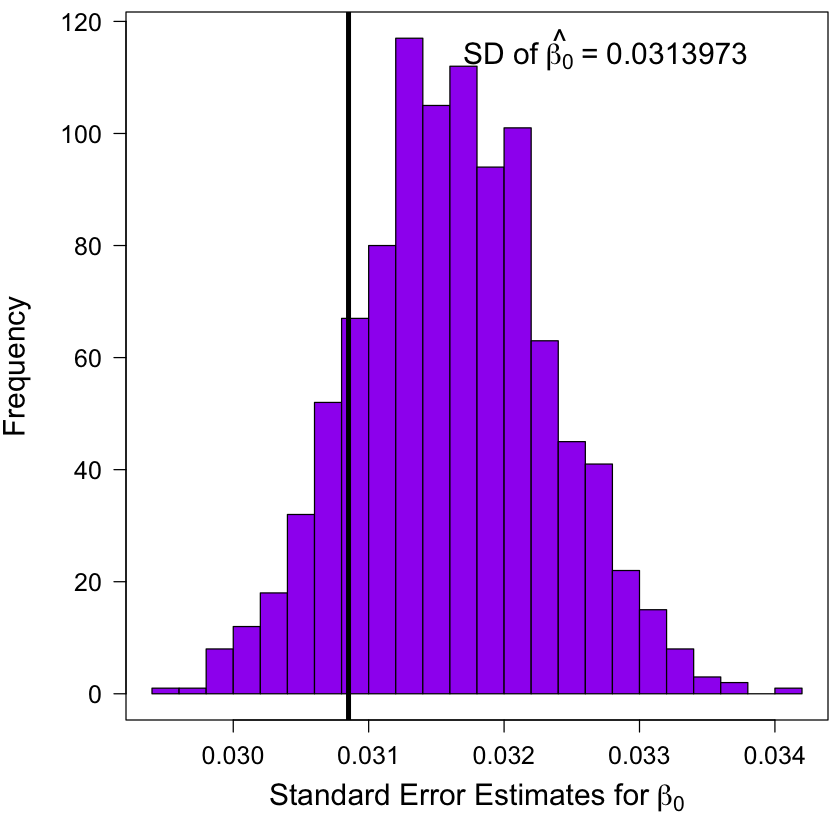

In [412]:
# And this is how we plot data
par(mar = c(5, 5.25, .5, .5))
hist(par.est[ , 3], breaks = 25, col = "purple", xlab = "", ylab = "",
     main = "", axes = FALSE)
axis(1, cex.axis = 1.25)
axis(2, cex.axis = 1.25, las = 2)
title(xlab = expression("Standard Error Estimates for"~beta[0]),
      cex.lab = 1.5)
title(ylab = expression("Frequency"), line = 3.75, cex.lab = 1.5)
abline(v = sd.beta0, lwd = 4)
text(.03275, 115, expression("SD of"~hat(beta[0])~"="~"0.0313973"),
     cex = 1.5)
box()

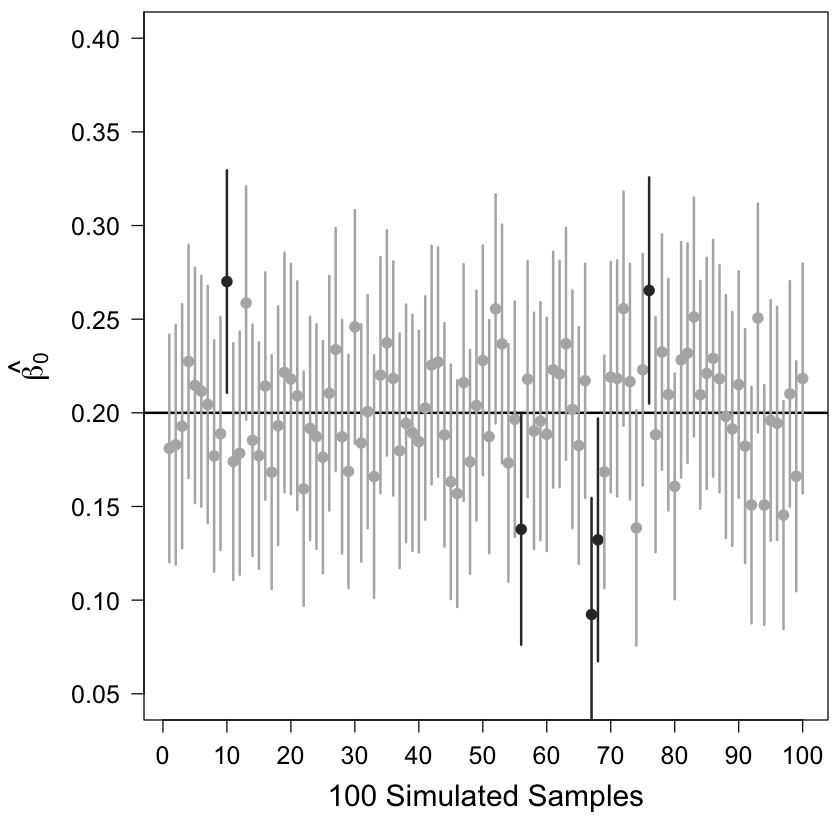

In [413]:
coverage <- function(b, se, true, level = .95, df = Inf){
  # b: Estimate, 
  # se: standard error,
  # true: true parameter, 
  # level: confidence level, 
  # df: degrees of freedom  
  # p=.95 = 0.025 ... 0.0975
  qtile <- level + (1 - level)/2 # Compute the proper quantile
  #Bounds for that
  lower.bound <- b - qt(qtile, df = df)*se # Lower bound
  upper.bound <- b + qt(qtile, df = df)*se # Upper bound 
  # Is the true parameter in the confidence interval? (yes = 1)
  true.in.ci <- ifelse(true >= lower.bound & true <= upper.bound, 1, 0)
  cp <- mean(true.in.ci) # The coverage probability
  mc.lower.bound <- cp - 1.96*sqrt((cp*(1 - cp))/length(b)) # Monte Carlo error  
  mc.upper.bound <- cp + 1.96*sqrt((cp*(1 - cp))/length(b))  
  return(list(coverage.probability = cp, # Return results
              true.in.ci = true.in.ci,
              ci = cbind(lower.bound, upper.bound),
              mc.eb = c(mc.lower.bound, mc.upper.bound)))
} # end of coverage function

cp.beta0 <- coverage(par.est[ , 1], par.est[ , 3], b0, df = n - model$rank)

#pdf("l5_cp_beta0.pdf")

#Set size of graph
par(mar = c(5, 6, .5, .5))

#plot base graph
plot(seq(1, 100, length = 100), seq(.05, .4, length = 100), type = "n",
     axes = FALSE, xlab = "", ylab = "")
title(xlab = expression("100 Simulated Samples"), cex.lab = 1.5)
title(ylab = expression(hat(beta[0])), line = 3.75, cex.lab = 1.5)

#Draw a box
box()

#Label axes
axis(1, at = seq(0, 100, 10), cex.axis = 1.25)
axis(2, at = seq(.05, 4, .05), cex.axis = 1.25, las = 2)
abline(h = b0, lwd = 2)

#Draw each simulation segments (vertical lines for bounds with the dot as the estimate)
for (i in 1:100){
  points(i, par.est[i, 1], lwd = 2, col = ifelse(cp.beta0$true.in.ci[i] == 1,
                                                 "gray70", "gray20"), pch = 19)
  segments(i, cp.beta0$ci[i, 1], i, cp.beta0$ci[i, 2], lwd = 2,
           col = ifelse(cp.beta0$true.in.ci[i] == 1, "gray70", "gray20"))
}

In [389]:
runif(1, -1, 1)
# THIS IS A FUNCTION DRAWING RANDOM NUMBERS
# first argument = how many
# second argument = from where
# third argument = to where
# other functions are plot(), glm()...

[1] 0.887135

In [384]:
runif(2, -1, 1)

[1] -0.8065867  0.2263959

Perhaps runif looks like this: 

`runif <- function(how_many, from_where, to_where)
  {
  out_vector <- c()
  for (i in 1:n)
     {
     out_number <- pull_from_magic_hat_with()
     out_vector <- c(out_vector,out_number)
     }
  return(out_vector)
  }`
  
And if you are curious what the `pull_from_magic_hat_with()` is and how it looks, talk to me in the break.

## BREAK

## EXTRABITS:

### I want to know more about loops!!!

##### Then, listen to Prof. Brailsford talk about loops, and explain another concept, which we won't go into, called recursion.

https://www.youtube.com/watch?v=HXNhEYqFo0o


### I heard loops are bad and horrible and horrendous and I shouldn't use them

##### <font color = red> Nope, they are not. </font>

Loops are how the computer is working internally at the processor level. There is actually a physical device on the CPU called an instruction counter to store the `i` in the `for (i in ...)`. 

The problem is R doesn't use any of that. It runs many layers of abstractions above that, which, due to some very technical bits, make expanding vectors and matrixes very, very, very slow. It is not the loop that is slow. It's the expansion of memory for the object.

Take for example this code generating 10000 sets of random draws from the normal distribution:

In [29]:
library(tictoc)
tic('slow:')
m <- matrix(nrow=100)

tic()
out <- matrix()
for (i in 1:10000) {
    column <- runif(100,0,1)
    m <- cbind(m,column)
    }
toc()
m[10:20,2:3]

slow:: 16.199 sec elapsed


column,column
0.450324646,0.151628864
0.007406086,0.345932738
0.856895935,0.856059054
0.758645290,0.345149706
0.711785325,0.868968603
0.223810140,0.231768531
0.100256446,0.009182001
0.523999131,0.823399324
0.818399202,0.289075383
0.217153959,0.943537469


You can fix this by simply pre-assigning the matrix with NA when you start your code, and filling it in place

In [30]:
library(tictoc)
tic('fast:')
m <- matrix(nrow=100, ncol=10000)

tic()
out <- matrix()
for (i in 1:10000) {
    column <- runif(100,0,1)
    m[,i] <- column
    }
toc()
m[10:20,2:3]

fast:: 0.071 sec elapsed


0.2999645,0.70195881
0.0755683,0.74003703
0.3735938,0.44591055
0.0282704,0.26926554
0.6440599,0.34156859
0.5230539,0.89163474
0.3950122,0.73696442
0.5695136,0.30036453
0.1488026,0.62369682
0.3360289,0.08807074
0.1318442,0.90774052


It is not the loop that is slow, that's fast.
It is the matrix expansion!

`Apply()`, `rapply()`, `sapply()` are functions looping without writing for-loops. This is called "functional programming" and is rather hard to grasp your head around. So hard in fact, most programmers think it's unintuitive and problematic for more than very simple one-liners - being a very complex mathematical abstaction.

If you feel comfortable with applys, use them, otherwise, for loops are "mainstream" in most languages -- less than 1% of code globally is written in functional form. But remember to assign the memory for the ending result (create an empty matrix of the expected number of columns and rows in the beginning).

In [31]:
small_data_frame=data.frame(x=c(1:10),b=c(2,4,6,8,10,12,14,16,18,20))
small_data_frame

lapply(small_data_frame,mean)

for (column in colnames(small_data_frame))
    {
    print(column)
    print(mean(small_data_frame[[column]]))
    }

x,b
<int>,<dbl>
1,2
2,4
3,6
4,8
5,10
6,12
7,14
8,16
9,18


$x
[1] 5.5

$b
[1] 11

[1] "x"
[1] 5.5
[1] "b"
[1] 11


# 4. Data Management

## What is data management?

**It is gathering and manipulating data from a raw format to a format that suits your analytic tasks**.

It consists of the following processes:

1. **Filtering** - selecting only the information you need from the whole dataset; This entails filtering observations (e.g. only countries in Africa) and columns (e.g. only countries in Africa)
1. **Aggregation** - changing the unit of analysis to a coarser level;
1. **Disaggregation** - breaking down a coarse-level dataset to a finer level;
1. **Joining** -- Bringing together multiple datasets containing different kinds of observations for the same units (e.g. make one dataset from two datasets of countries, one containing GDP information and one containing conflict information);
1. **Union** -- "Glueing" together observations from two datasets having the same structures but different units
1. **Transforms** -- Changing data to suit your needs (recode, create derived measures etc.)


We are going to use a **language** for data management called **dplyr**. It's an extension to R, works well with base R, but makes life easy and allows good management to happen.

You can use it by loading either **dplyr** or **tidyverse** libraries.

## **Filtering**
![Filtering](img/dm_fil.png)

### We filter using the following functions

#### For columns:

`select(dataframe, c(ROWS WE WANT))`

Example `select(dataframe, c(country, gdp))`

#### For rows: 

`filter(dataframe, CONDITION)`

Example `filter(dataframe, gdp<10000)`
Available operators are `< > <= >= == is.na() !in.na() %in%`


`sample_frac(dataframe, PERC)`
`sample_n(dataframe, N)`

## **Aggregation**
![Filtering](img/dm_group.png)

## We do this in two steps!

`grouped_table = group_by(table, VARIABLES WE WANT TO GROUP BY)`

followed by

`summarized = summarize(grouped_table, variable = FUNCTION(column))`

There are many functions you can use:
`n(), sum(), avg(), median(), sd(), min(), max()`

# If you want only to eliminate duplicates from your dataset

You could very well do something like

`grouped_table = group_by(table, ALL VARIABLES)`

followed by

`eliminated = summarize(group table, new_var1 = max(var1) ...)`

But there are some helper functions so that you don't waste time when you have a lot of columns:

`distinct(table)`

AND

`summarize_all()`

## **Disaggregation**
![Filtering](img/dm_diss.png)


## **Joining**
![Filtering](img/dm_join.png)

## **Inner Joins**
![Filtering](img/dm_join_inner.png)

### Inner joins will only keep those observations that exist in BOTH table A and table B. This is the default behavior in almost all langages (`base R, dplyr, SQL, Pandas`).

#### Thus, ALWAYS be careful when joining not to lose observations by mistakes when you still need them

## **Left Joins**
![Filtering](img/dm_join_left.png)

### Left joins will only keep the structure of the LEFT table (table A). 

#### This allows you to carry a table-structure from the beginning of your data management work to the end, and take care of your NAs (missing observations) at the end of the work.

## **Right Joins**
![Filtering](img/dm_join_right.png)

### Right joins will only keep the structure of the RIGHT table (table B). 

#### Order thus matters. A x B is NOT B x A!

## **Outer Joins**
![Filtering](img/dm_join_outer.png)

### Outer joins will keep all observations in BOTH A AND B

#### Always check how your matching variable looks! Sometimes, in places like SQL, you have to specify to keep both the matching variables present in A and B, otherwise you may end up with NAs in the resulting table.

## Transform

![Filtering](img/dm_lag.png)

# THERE'S AN ORDER TO OPERATIONS

### 1. EXPLORE
### 2. PLAN
### 3. FILTER
### 4. AGGREGATE
### 5. UNION
### 6. JOIN


### If you need to x. TRANSFORM DATA, put this step in the dataset that has the FEWEST observations

Why do we do this? For performance! We first reduce the amount of data, so that computationally expensive merges



## We need a task

#### Task : I want to know whether there is a relationship between GDP growth and the number of conflicts in Sub-Saharan Africa between 2015 and 2018


### Let's first load some data

In [33]:
conflict = read_csv('https://raw.githubusercontent.com/mihaicroicu/AQMLecture1/master/Data/aqm1_conflict.csv')
country = read_csv('https://raw.githubusercontent.com/mihaicroicu/AQMLecture1/master/Data/aqm1_country.csv')

Parsed with column specification:
cols(
  conflict_id = col_double(),
  year = col_double(),
  country = col_character(),
  country_id = col_double(),
  side_a = col_character(),
  side_a_id = col_double(),
  side_b = col_character(),
  side_b_id = col_character(),
  fatalities = col_double(),
  type_of_conflict = col_character(),
  incompatibility = col_double(),
  territory_name = col_character()
)

Parsed with column specification:
cols(
  country_name = col_character(),
  cid = col_double(),
  country_id = col_double(),
  year = col_double(),
  proportion_educated = col_double(),
  gdp = col_double(),
  population = col_double()
)



## We can look at the data in various ways

### Look at a few rows

  

In [78]:
head(country)

country_name,cid,country_id,year,proportion_educated,gdp,population
Cape Verde,40,402,2010,0.284,1502.29,496
Cape Verde,40,402,2011,0.289,1509.93,499
Cape Verde,40,402,2012,0.293,1407.29,503
Cape Verde,40,402,2013,0.298,1492.12,506
Cape Verde,40,402,2014,0.303,1509.10,510
Cape Verde,40,402,2015,0.308,1513.00,513


In [79]:
head(conflict)

conflict_id,year,country,country_id,side_a,side_a_id,side_b,side_b_id,fatalities,type_of_conflict,incompatibility,territory_name
283,2016,DR Congo (Zaire),490,Government of DR Congo (Zaire),89,Kamuina Nsapu,6590,164,3,2,NA
283,2017,DR Congo (Zaire),490,Government of DR Congo (Zaire),89,"CMC, CNPSC (Yakutumba), Kamuina Nsapu, M23, MNR","1160, 3043, 6590, 6740, 6920",1608,3,2,NA
287,2015,Burundi,516,Government of Burundi,93,"FPB, Military faction (forces of Godefroid Niyombare)","6187, 6297",133,3,2,NA
297,2016,Nigeria,475,Government of Nigeria,84,Jama'atu Ahlis Sunna Lidda'awati wal-Jihad,1051,162,4,2,NA
297,2017,Nigeria,475,Government of Nigeria,84,Jama'atu Ahlis Sunna Lidda'awati wal-Jihad,1051,1062,4,2,NA
297,2015,Nigeria,475,Government of Nigeria,84,Jama'atu Ahlis Sunna Lidda'awati wal-Jihad,1051,2703,4,2,NA


### And find out a little bit about the type of data in the dataset

In [51]:
str(country)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	416 obs. of  7 variables:
 $ country_name       : chr  "Cape Verde" "Cape Verde" "Cape Verde" "Cape Verde" ...
 $ cid                : int  40 40 40 40 40 40 40 40 41 41 ...
 $ country_id         : int  402 402 402 402 402 402 402 402 437 437 ...
 $ year               : int  2010 2011 2012 2013 2014 2015 2016 2017 2010 2011 ...
 $ proportion_educated: num  0.284 0.289 0.293 0.298 0.303 0.308 0.315 0.322 0.214 0.222 ...
 $ gdp                : num  1502 1510 1407 1492 1509 ...
 $ population         : int  496 499 503 506 510 513 516 519 19738 20120 ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 7
  .. ..$ country_name       : list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  .. ..$ cid                : list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ country_id         : list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ year               : lis

### Let's check the temporal and spatial extent of the data.

Let's do this it like this.
1. We first take out the year column from the data.
2. We then only keep distinct observations so that we get 2015, 2016, 2017 and not 2015, 2015, 2015, 2015, 2015,...
3. We sort it, so that we don't get 2010, 2015, 2014, 2016

We do this using the **dplyr** `distinct()` function which returns deduplicated items

In [14]:
# First, filter
extent <- select(country, year) 

# Then, aggregate We use distinct, because we only need a distinct copy!
extent <- distinct(extent, year)

# And then we sort and prepare the data
extent <- arrange(extent, year)

# And then we print the output
#
extent

year
2010
2011
2012
2013
2014
2015
2016
2017


### Or, we can chain this with pipes.

In [15]:
country %>% select(year) %>% distinct(year) %>% arrange(year)

year
2010
2011
2012
2013
2014
2015
2016
2017


In [69]:
distinct(country['country_name'])
distinct(conflict['country'])

country_name
Cape Verde
Cote d'Ivoire
Ghana
Liberia
Burkina Faso
Guinea
Guinea-Bissau
Mali
Senegal
Sierra Leone


country
DR Congo (Zaire)
Burundi
Nigeria
Sudan
Uganda
Ethiopia
Mozambique
Somalia
Cameroon
Mali


## Let's plan

1. **Filter** = we only need the country name, country id, year and GDP column from the country table. We also only want data from 2015 and onwards, so let's filter for that as well. It's not needed now, but when we have 1.000.000 rows and an old laptop...
1. **Aggregate** = the conflict data to country level, taking the sum of fatalities. This will also filter it for us!
1. **Join** = We use the filtered country table as base. What kind of join do we need?
1. **DONE**

In [50]:
#FILTERING
filtered_country <- select(country, country_name, country_id, year, gdp)
filtered_country <- filter(filtered_country, year>=2015 & year<2019)
filtered_country

country_name,country_id,year,gdp
Cape Verde,402,2015,1513.00
Cape Verde,402,2016,1561.10
Cape Verde,402,2017,1712.70
Cote d'Ivoire,437,2015,3267.81
Cote d'Ivoire,437,2016,3465.94
Cote d'Ivoire,437,2017,2894.78
Ghana,452,2015,3950.29
Ghana,452,2016,4001.10
Ghana,452,2017,4157.05
Liberia,450,2015,788.56


In [18]:
# AGGREGATION
grouped_conflict <- group_by(conflict,country_id,year)
conflicts_in_country <- summarize(grouped_conflict, number_of_conflicts=n(), fatalities=sum(fatalities))
conflicts_in_country

country_id,year,number_of_conflicts,fatalities
432,2015,3,165
432,2016,1,96
432,2017,2,345
436,2015,1,171
436,2016,1,274
436,2017,1,203
471,2015,2,995
471,2016,2,221
471,2017,1,63
475,2015,2,4622


In [19]:
final_dataset <- left_join(filtered_country, conflicts_in_country, by=c('country_id','year'))
final_dataset


country_name,country_id,year,gdp,number_of_conflicts,fatalities
Cape Verde,402,2015,1513.00,NA,NA
Cape Verde,402,2016,1561.10,NA,NA
Cape Verde,402,2017,1712.70,NA,NA
Cote d'Ivoire,437,2015,3267.81,NA,NA
Cote d'Ivoire,437,2016,3465.94,NA,NA
Cote d'Ivoire,437,2017,2894.78,NA,NA
Ghana,452,2015,3950.29,NA,NA
Ghana,452,2016,4001.10,NA,NA
Ghana,452,2017,4157.05,NA,NA
Liberia,450,2015,788.56,NA,NA


But what if the columns in A and B don't match by name before joining
We actually need to rename these!

We use dplyr's `rename()`. Let's try it here instead 

I don't like `number_of_conflicts` as a column name, I would prefer `count_conflicts` instead. Shorter!

In [20]:
final_data_renamed <- rename(final_dataset, count_conflicts = number_of_conflicts)
final_data_renamed

country_name,country_id,year,gdp,count_conflicts,fatalities
Cape Verde,402,2015,1513.00,NA,NA
Cape Verde,402,2016,1561.10,NA,NA
Cape Verde,402,2017,1712.70,NA,NA
Cote d'Ivoire,437,2015,3267.81,NA,NA
Cote d'Ivoire,437,2016,3465.94,NA,NA
Cote d'Ivoire,437,2017,2894.78,NA,NA
Ghana,452,2015,3950.29,NA,NA
Ghana,452,2016,4001.10,NA,NA
Ghana,452,2017,4157.05,NA,NA
Liberia,450,2015,788.56,NA,NA


### We're done, right?

### Nope. Look at the conflict columns!

### Let's fix this!

## Let's plan

1. **Fiter** = we only need the country name, country id, year and GDP column from the country table. We also only want data from 2015 and onwards, so let's filter for that as well. It's not needed now, but when we have 1.000.000 rows and an old laptop...
1. **Aggregate** = the conflict data to country level, taking the sum of fatalities. This will also filter it for us!
1. **Join** = We use the filtered country table as base. What kind of join do we need?
1. <font color='red'> **Transform** = Since the conflict table only contained conflicts, countries that did not match have 0 (NO CONFLICTS) and not NA (unknown/unregistered conflicts). We need to fix this. </font>
1. **DONE**

In [21]:
# We need to do this because, 0 is, by default, stored as a real number, i.e. 0.0000000000
# And the column we want to replace is integer, so expects 0.
# This is an R thing. 
zero <- as.integer(0)

really_final <- mutate(final_data_renamed, 
                       count_conflicts=coalesce(count_conflicts,zero),
                       fatalities=coalesce(fatalities,zero))

arrange(really_final,country_id,year)

country_name,country_id,year,gdp,count_conflicts,fatalities
Cape Verde,402,2015,1513.00,0,0
Cape Verde,402,2016,1561.10,0,0
Cape Verde,402,2017,1712.70,0,0
Guinea-Bissau,404,2015,1430.84,0,0
Guinea-Bissau,404,2016,1473.04,0,0
Guinea-Bissau,404,2017,1660.13,0,0
Equatorial Guinea,411,2015,27414.16,0,0
Equatorial Guinea,411,2016,23822.54,0,0
Equatorial Guinea,411,2017,33837.77,0,0
The Gambia,420,2015,1595.62,0,0


### But I asked the prof. and the prof. said that I shouldn't use GDP, I should instead use the logarithm of GDP!

In [29]:
with_logs <- mutate(really_final, log_gdp=log(gdp+1))
with_logs

# Always add +1 when doing logs. Why? Because log(0) does not exist, but log(1)=0!

country_name,country_id,year,gdp,count_conflicts,fatalities,log_gdp
Cape Verde,402,2015,1513.00,0,0,7.322510
Cape Verde,402,2016,1561.10,0,0,7.353786
Cape Verde,402,2017,1712.70,0,0,7.446410
Cote d'Ivoire,437,2015,3267.81,0,0,8.092181
Cote d'Ivoire,437,2016,3465.94,0,0,8.151028
Cote d'Ivoire,437,2017,2894.78,0,0,7.971010
Ghana,452,2015,3950.29,0,0,8.281797
Ghana,452,2016,4001.10,0,0,8.294575
Ghana,452,2017,4157.05,0,0,8.332801
Liberia,450,2015,788.56,0,0,6.671476


### And I asked the prof. and the prof. said that I should also _lag_ GDP
We frequently use lags, because cause->effect relations take time to develop. It's likely that an economic collapse won't trigger conflict immediately, but in a year!. So we use last year's GDP to see if it has an effect on conflict.

In [47]:
with_lags <- really_final %>% arrange(country_name, year) %>% group_by(country_name) %>% mutate(lagged_gdp = lag(gdp))

# OR, if you want it without pipes
with_lags <- arrange(really_final,country_name, year)
with_lags <- group_by(with_lags,country_name)
with_lags <- mutate(with_lags,lagged_gdp = lag(gdp))

with_lags

#Why did we need to arrange the data first?
#Why did we need to group it afterwards?
#Can we compute a change in GDP from past year to current year? How?

country_name,country_id,year,gdp,count_conflicts,fatalities,lagged_gdp
Algeria,615,2015,13807.18,2,110,NA
Algeria,615,2016,14059.21,1,86,13807.18
Algeria,615,2017,14353.67,1,60,14059.21
Angola,540,2015,6265.56,0,0,NA
Angola,540,2016,6057.95,0,0,6265.56
Angola,540,2017,1563.85,1,25,6057.95
Benin,434,2015,1996.73,0,0,NA
Benin,434,2016,2019.64,0,0,1996.73
Benin,434,2017,2005.93,0,0,2019.64
Botswana,571,2015,15450.28,0,0,NA


Sometimes, you want to lag (shift) by more than 1 year in the past. Use `lag(VARIABLE, nL)` where n is the number of rows to go back. 

Example, 
`with_lags <- mutate(with_lags,lagged_gdp = lag(gdp, 10L))`
would lag 10 years, not one.

Sometimes, you want data from the future. This is called a `lead`, and the function is `lead()`. Works the same as `lag()`.

# Advice : Keep your data clean!

## Clean (or _tidy_ in R lingo) means:

## 1. One variable per column
## 2. One observation per row

If you have a country-year dataset containing GDP and Population, each row should be a country-year, and GDP and Population their own columns. Of course, the country name (and identifier) and year should be included.

If this is not the case, you can use `gather()` and `spread()`


In [49]:
#These examples come directly from dplyr(). Why is this NOT CLEAN?
table2

country,year,type,count
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258
China,1999,population,1272915272


In [54]:
#And let's clean it up!
#spread() takes multi-row observations and turns it into a single row with multiple observations
spread(table2, key = type, value = count)

country,year,cases,population
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [58]:
table4a
#Why is this one not clean?

country,1999,2000
Afghanistan,745,2666
Brazil,37737,80488
China,212258,213766


In [63]:
#And let's clean it up!
#spread() takes multi-column observations and turns it into a single row with multiple observations
gather(table4a,`1999`, `2000`, key = "year", value = "deaths")

country,year,deaths
Afghanistan,1999,745
Brazil,1999,37737
China,1999,212258
Afghanistan,2000,2666
Brazil,2000,80488
China,2000,213766


# Documentation and future help!

## A cheatsheet:

[https://github.com/rstudio/cheatsheets/blob/master/data-transformation.pdf]

## And documentation:
[https://cran.r-project.org/web/packages/dplyr/vignettes/dplyr.html]

## A whole book on this:
https://r4ds.had.co.nz/

# HOMEWORK

## <font color='red'> This consists of two files: </font>

### 1. Homework assignment 2
https://github.com/mihaicroicu/AQM2019/blob/master/assignments/assignment1.1.md